# Natural Language Processing

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
data = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

## Cleaning the texts

In [3]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-z]', ' ', data.iloc[i, 0])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohmmadmusaddique/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# print(corpus)

## Creating the Bag of Words model

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, -1].values

In [6]:
len(X[0])

1500

## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Training the ML model on the Training set

In [8]:
from sklearn.svm import SVC
classifier = SVC(C = 1, kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

## Predicting the Test set results

In [9]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]

## Making the Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[79 18]
 [24 79]]


In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)

79.0


# Classification Report

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        97
           1       0.81      0.77      0.79       103

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



# Models with accuracies

* Naive bays = 73%
* KNN = 66%
* *Random forset = 72.5%
* kernal svm = 78%
* svm = 79%
* XGBoost = 72%

# Applying K-Fold Cross Validation

In [13]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = classifier, X = X_test, y = y_test, cv = 10)
print('Accuracy : {:2f}'.format(accuracy.mean()*100))
print('Standard Deviation: {:2f}'.format(accuracy.std()*100))

Accuracy : 74.000000
Standard Deviation: 6.633250


# CAP Curve Analysis

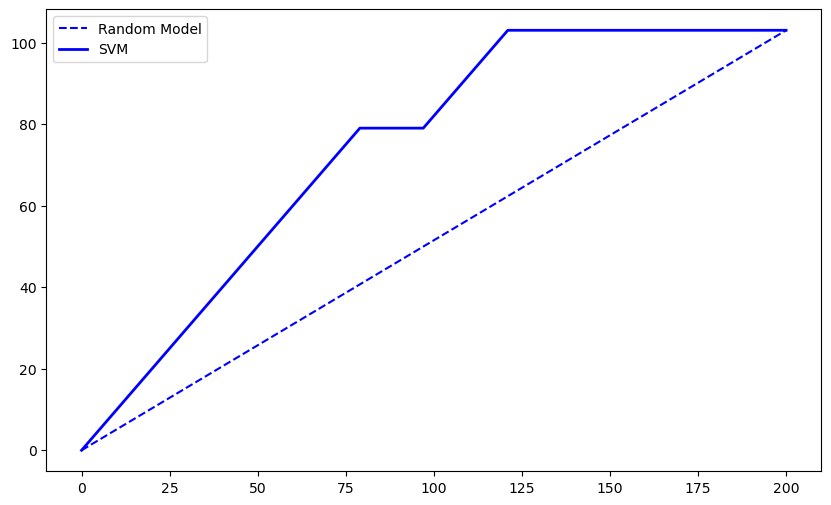

In [14]:
total = len(y_test)
one_count = np.sum(y_test)
zero_count = total - one_count
plt.figure(figsize = (10, 6))
plt.plot([0, total], [0, one_count], c = 'b',
		linestyle = '--', label = 'Random Model')
lm = [y for _, y in sorted(zip(y_pred, y_test), reverse = True)]
x_cap = np.arange(0, total + 1)
y_cap = np.append([0], np.cumsum(lm))
plt.plot(x_cap, y_cap, c = 'b', label = 'SVM', linewidth = 2)
plt.legend()
plt.show()

# Single Review

In [16]:
def answer_to_review(new_review):
    new_review = re.sub('[^a-zA-z]', ' ', new_review)
    new_review = new_review.lower()
    new_review = new_review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
    new_review = ' '.join(new_review)
    new_X = cv.transform([new_review]).toarray()
    new_y_pred = classifier.predict(new_X)
    if new_y_pred == [1]:
        return 'Positive'
    else:
        return 'Negative'

### Positiv review

Use our model to predict if the following review:

"I love this restaurant so much"

is positive or negative.

In [17]:
answer = answer_to_review('I love this restaurant so much')
print('The review is', answer)

The review is Positive


### Negetive review

Use our model to predict if the following review:

"I hate this restaurant so much"

is positive or negative.

In [18]:
answer = answer_to_review('I hate this restaurant so much')
print('The review is', answer)

The review is Negative
